# Sampling Methods
### Notebook that details the different sampling methods along with simulation code
Sampling is the process of selecting a subset of individuals from a larger population to estimate characteristics of the whole population.

### 1. Simple Random sampling

Simple random sampling is a straightforward method where every member of the population has an equal chance of being selected

Use Cases:
Public opinion polls,
Market research,
Any scenario requiring an unbiased representation of the population

In [133]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime 
import sklearn.model_selection
import sklearn.metrics
plt.style.use('fivethirtyeight')

In [138]:
# Sample dataset
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Age': [25, 30, 35, 40, 45],
        'Salary': [50000, 60000, 70000, 80000, 90000]}
df = pd.DataFrame(data)

In [63]:
def percentage_diff_2d(var1,var2):
    diff = round((var2-var1)/var1,2)*100
    return diff

In [97]:

def simple_random_choice(population,sample_size):
    sample = np.random.choice(np.arange(population), size = sample_size, replace=False)
    pop_mean = np.arange(population).mean()
    sam_mean = sample.mean()
    diff = percentage_diff_2d(pop_mean, sam_mean)
    return np.abs(diff)

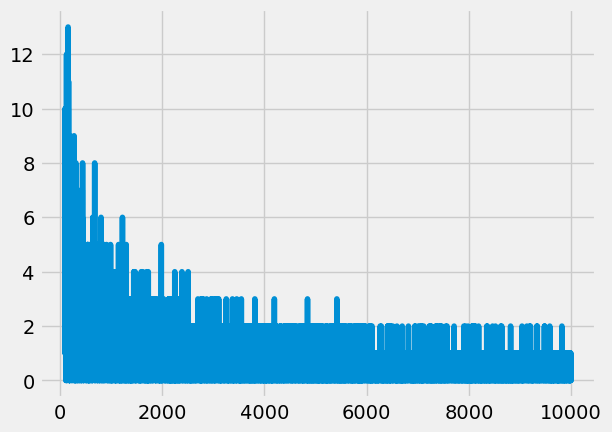

In [127]:
percentage_diff = []
population = 100000
sample_size = 1000
simple_random_choice(100000,10000)
for value in np.arange(100,10000):
    percentage_diff.append(simple_random_choice(population, value))
plt.plot(np.arange(100,10000),percentage_diff)

The percentage difference between the sample mean and the population mean reduce with the increase in sample size. This is also a reference to the Central limit theorem that proves that the mean of the sampling distribution will converge to the population mean as sample size increases

### 2. Stratified Sampling

Definition: Dividing the population into strata (groups) and sampling proportionally from each.

Use Cases:
Educational research across different grades
Health studies across age groups

This is useful when the population contains sub cohorts that behave differently and have different distributions so a simple ransom smaple may not be representative of all the cohorts

In [151]:
from sklearn.model_selection import train_test_split

df['Group'] = ['A', 'B', 'A', 'B', 'A']

# Stratified sampling
stratified_sample, _ = train_test_split(df, test_size=0.4, stratify=df['Group'],random_state = 42)
print(stratified_sample)

      Name  Age  Salary Group
2  Charlie   35   70000     A
0    Alice   25   50000     A
3    David   40   80000     B


Example code below of creating stratified samples by generating multiple samples for each stratum

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Assume 'data' is a DataFrame with a 'stratum' column
strata = data['stratum'].unique()
stratified_sample = pd.DataFrame()

for stratum in strata:
    stratum_data = data[data['stratum'] == stratum]
    sample, _ = train_test_split(stratum_data, test_size=0.8, random_state=42)
    stratified_sample = pd.concat([stratified_sample, sample])

### 3. Cluster Sampling

Cluster sampling involves dividing the population into clusters, usually based on geographical areas, and then randomly selecting entire clusters

Use Cases:
Large-scale surveys (e.g., national health surveys)
Studies involving geographically dispersed populations

Stratified sampling: Population divided into subgroups (strata) based on shared characteristics, then samples taken proportionally from each stratum. Ensures representation of all subgroups.

Cluster sampling: Population divided into clusters (usually geographic), then entire clusters are randomly selected. More convenient but less precise than stratified sampling.
Key difference: Stratified samples from all groups; cluster takes entire groups.
Example:

Stratified: Sample 20% of students from each grade level
Cluster: Randomly select entire classrooms

In [ ]:
import numpy as np

# Assume 'clusters' is a list of cluster IDs
clusters = np.arange(100)
selected_clusters = np.random.choice(clusters, size=10, replace=False)

# Assume 'data' is a DataFrame with a 'cluster_id' column
cluster_sample = data[data['cluster_id'].isin(selected_clusters)]

Purpose of Stratify
The main purposes of using the stratify parameter are:

**Maintaining Class Distribution:** It ensures that both the training and test sets have the same class distribution as the original dataset. This is crucial for creating representative samples for model training and evaluation 

**Handling Imbalanced Datasets:** In cases where one class significantly outnumbers others, stratification helps prevent situations where a subset might lack examples from minority classes 

**Improving Model Reliability:** By maintaining class proportions, stratification helps in obtaining more reliable and consistent results in model training and evaluation 
 
**Reducing Bias:** It prevents the model from being biased towards the majority class, which can happen if the split doesn't maintain the original class distribution 
.


Stratification is also crucial in **cross-validation techniques**, particularly when using StratifiedKFold:

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### 4. Systematic Sampling

Systematic sampling involves selecting every nth member from a list of the population 
.
Use Cases:
Quality control processes in manufacturing
Surveys with ordered populations

Use Cases:
Quality control processes in manufacturing
Surveys with ordered populations

In [ ]:
import numpy as np

population = np.arange(1000)
step = 10  # Select every 10th item
systematic_sample = population[::step]

Circumstances Where Systematic Sampling Might Be Used
While not commonly recommended for time series analysis or switchback tests, systematic sampling could potentially be used under certain circumstances:

**Large, Uniform Datasets:** In cases where the time series data is very large and known to be relatively uniform without significant temporal patterns, systematic sampling might be used as a simple method to reduce the dataset size.

**Preliminary Analysis:** It might be used in the early stages of analysis to get a quick overview of the data, before moving on to more sophisticated sampling methods.

**Quality Control in Manufacturing:** In time series data from manufacturing processes, systematic sampling might be used for quality control by inspecting every nth item on a production line, assuming the production process is stable and uniform 

**Environmental Monitoring:** In some environmental studies where data points are collected at regular intervals across a geographic area, systematic sampling could be applied if the temporal and spatial patterns are known to be relatively consistent 

# Non-probability sampling

In this kind of sampling, we intentionally do not assign importance to each element in the population having an equal chance of being picked up in the sample.

### 1. Quota Sampling

In this, we divide the population into quotas that represent the population, and this forms the basis of the elements we select in the sample. This might look similar to random sampling, but the important difference is that we first divide the population into fixed quotas. From these fixed quotas, we select the sample. Quota could be something like all males above 20 or children between 12 and 18 years of age. Using quota sampling saves time and resources and is a quick way to get the study started.

### 2. Snowball sampling

This is one of the most interesting non-probabilistic techniques. You first select, at random, members for the sample. Suppose you selected 3 members. Now, these three will suggest more names for the study, and this creates a chain effect. Snowball sampling is useful in cases where it is difficult to locate people, or they do not wish to be identified. For instance, in medical research where you are studying a rare disease, you might find that snowball sampling is the only way you can get to the desired sample size.

2.2.1 Linear snowball sampling

The chain grow linearly. Each member in the sample refers to one more member.

2.2.2 Exponential non-discriminative snowball sampling

One to many relationships. Each member in the study refers to multiple members, and all are selected in the study. As you can imagine, this creates an exponential effect on the size of the sample. As you might have guessed, this may introduce bias into the sampling and researchers have no idea if the sample is representative of the population under study.

2.2.3 Exponential discriminative snowball sampling

Here, while we will request the member to provide multiple referrals, we will select only one out of these and nullify the remaining referrals. By doing this, researchers attempt to reduce the chances of bias in the sampling technique.

### 3. Judgment sampling

Here, the researcher brings forth their qualified opinion and judgment on who should be part of the sample. This is typically used where you want to select experts or highly intellectual individuals in your sample. The best approach is to identify the experts and form the sample.

### 4. Convenience sampling

Here, we prioritize the accessibility of the element above other considerations. The researcher selects the elements based on convenience. This is typically used in the initial phases of the survey, where the researcher intends to gain quick feedback on the design of the survey. It helps to quickly prototype the survey design.

References:

1. You.com search
https://you.com/search?q=What+are+the+different+sampling+and+resampling+methods+in+statistics+and+when+is+it+used%3F+Can+you+provide+pyhton+code+for+each+with+a+sample+real+world+dataset%3F&tbm=youchat&cfr=chat&cid=c0_51bbe3b1-edc6-4b5e-b290-68c841201228&chatMode=research

2. Analytics Vidhya
https://www.analyticsvidhya.com/blog/2021/09/a-complete-guide-on-sampling-techniques/#:~:text=In%20disproportionate%20stratified%20random,representation%20in%20the%20sample%2C

3. Statsig documentation
https://docs.statsig.com/experiments-plus/stratified-sampling
